In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

# Reading data for 3 resolutions

Muninn format

In [2]:
datatime=[]
datagrid=[]
datam=[]
databeta=[]
datapsi=[]
dataderpsi=[]
vars=["m", "beta", "psi", "derpsi"]
res=[1,2,3]
for resolution in res:


    time=[]
    grid=[]
    m=[]
    beta=[]
    psi=[]
    derpsi=[]
    k=1

    for var in vars:
        dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res{}/{}.txt".format(resolution,var)
        #dir = "/home/rita13santos/Desktop/muninnDATA/res{}/{}.txt".format(resolution,var)
    
    
        print(dir)

        with open(dir) as f:
            for line in f:

                index = line.find("Time")
                if index==1:
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]
                

                else:
                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))
                    elif a==[]:
                        grid.append(auxgrid)
                        if k==1:
                            m.append(auxdata)
                        elif k==2:
                            beta.append(auxdata)
                        elif k==3:
                            psi.append(auxdata)
                        elif k==4:
                            derpsi.append(auxdata)
                    
        k=k+1


    datatime.append(time)
    datagrid.append(grid)
    datam.append(m)
    databeta.append(beta)
    datapsi.append(psi)
    dataderpsi.append(derpsi)
#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/derpsi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res2/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res2/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res2/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res2/derpsi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res3/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res3/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res3/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res3/derpsi.tx

In [3]:
print(len(datam[0]))
print(len(databeta[0]))
print(len(datapsi[0]))
print(len(dataderpsi[0]))

401
401
401
401


## CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


In [3]:
res=[1,2,3]
step=100
datam=[]
databeta=[]
datapsi=[]
dataderpsi=[]
datagrid=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    m=[]
    beta=[]
    psi=[]
    derpsi=[]
    grid=[]
    
    #iterate over files in dir
    for i in range(count-1):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i*step), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        
        ##
        aux = [float(x) for x in df[0]]
        m.append(aux)
        aux = [float(x) for x in df[1]]
        beta.append(aux)
        aux = [float(x) for x in df[2]]
        psi.append(aux)
        aux = [float(x) for x in df[3]]
        derpsi.append(aux)
        aux = [float(x) for x in df[4]]
        grid.append(aux)
        ##
        
        """aux=[]
        for i in range(0, len(df[0])):
            if isNaN(df[0][i])==True:
                a=0
                print("NaN detected in position i = ", i)
            else:
                a=BigFloat.exact(df[0][i], precision=128)
            aux.append(a)
        m.append(aux)
 
        aux=[]
        for i in range(0, len(df[1])):
            if isNaN(df[1][i])==True:
                a=0
                print("NaN detected in position i = ", i)
            else:
                a=BigFloat.exact(df[1][i], precision=128)
            aux.append(a)
        beta.append(aux)
        
        aux=[]
        for i in range(0, len(df[2])):
            if isNaN(df[2][i])==True:
                a=0
                print("NaN detected in position i = ", i)
            else:
                a=BigFloat.exact(df[2][i], precision=128)
            aux.append(a)
        
        psi.append(aux)
        
        aux=[]
        for i in range(0, len(df[3])):
            if isNaN(df[2][i])==True:
                a=0
                print("NaN detected in position i = ", i)
            else:
                a=BigFloat.exact(df[3][i], precision=128)
            aux.append(a)
        derpsi.append(aux)
        
        aux=[]
        for i in range(0, len(df[4])):
            if isNaN(df[2][i])==True:
                a=0
                print("NaN detected in position i = ", i)
            else:
                a=BigFloat.exact(df[4][i], precision=128)
            aux.append(a)
        grid.append(aux)"""

    # f[i] is the array of the values of m on the whole grid on time step i
    
    
    datam.append(m)
    databeta.append(beta)
    datapsi.append(psi)
    dataderpsi.append(derpsi)
    datagrid.append(grid)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1 is:  521
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2 is:  1041
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3 is:  2081


####

In [18]:
final_t=count
print(count)

NameError: name 'count' is not defined

In [4]:
print(datam[0][0][1]) # datam indexes give res, time then gridpoint

-1.3221229798e-14


In [5]:
L=len(datam[0][0])-6 # grid length without the ghostpoints
dx=datagrid[0][0][1]-datagrid[0][0][0]

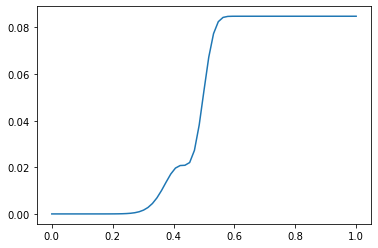

In [6]:
#plt_x1 = np.linspace(0, 1, L)
#plt_x2 = np.linspace(0, 1, 2*L-1)
#plt_x3 = np.linspace(0, 1, 4*L-3)
t=0
plt_x1 = datagrid[0][t][3:len(datagrid[0][0])-3]
plt_x2 = datagrid[1][t*2][3:len(datagrid[1][0])-3]
plt_x3 = datagrid[2][t*3][3:len(datagrid[2][0])-3]

plt.plot(plt_x1,datam[0][0][3:len(datam[0][0])-3])
#plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
#plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [7]:
plt.rcParams.update({'font.size': 12})

# Plotting data with resolutions 1 and 2 and differences 

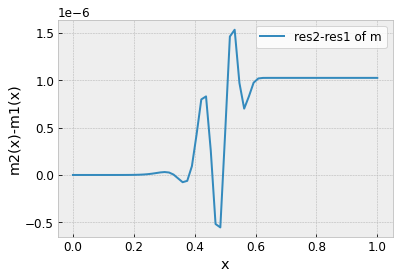

In [8]:
# for given t
t1=0 #last timestep
t2=2*t1
t3=4*t1
auxm = []
auxbeta = []
auxpsi = []
auxderpsi = []
auxgrid = []

for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxm.append(datam[1][t2][i])
        auxbeta.append(databeta[1][t2][i])
        auxpsi.append(datapsi[1][t2][i])
        auxderpsi.append(dataderpsi[1][t2][i])
        auxgrid.append(datagrid[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))
diffs_2_1.append(np.subtract(datagrid[0][t1][3:len(datagrid[0][t1])-3],auxgrid))

with plt.style.context('bmh'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()

# Pointwise convergence tests: plots for thesis project report 

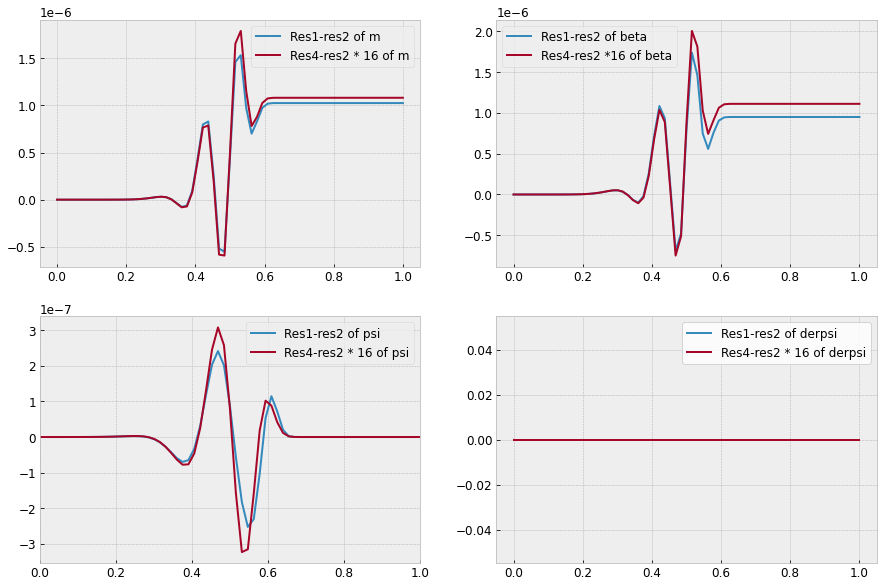

In [9]:
# for given t

aux2m = []
aux2beta = []
aux2psi = []
aux2derpsi = []
aux2grid = []
for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2m.append(datam[2][t3][i])
        aux2beta.append(databeta[2][t3][i])
        aux2psi.append(datapsi[2][t3][i])
        aux2derpsi.append(dataderpsi[2][t3][i])
        aux2grid.append(datagrid[2][t3][i])
        


#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxm,aux2m))
diffs_4_2.append(np.subtract(auxbeta,aux2beta))
diffs_4_2.append(np.subtract(auxpsi,aux2psi))
diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))
diffs_4_2.append(np.subtract(auxgrid,aux2grid))

with plt.style.context('bmh'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))

    ax[0][0].plot(plt_x1, (diffs_2_1[0]), label='Res1-res2 of m')
    ax[0][0].plot(plt_x1, (diffs_4_2[0])*16, label='Res4-res2 * 16 of m')
    ax[0][0].legend()
    
    ax[0][1].plot(plt_x1, (diffs_2_1[1]), label='Res1-res2 of beta')
    ax[0][1].plot(plt_x1, (diffs_4_2[1])*16, label='Res4-res2 *16 of beta')
    #ax[0][1].set_xlim([0, 0.05])
    #ax[0][1].set_ylim([0, 1*10**(-11)])
    ax[0][1].legend()
    
    ax[1][0].plot(plt_x1, (diffs_2_1[2]), label='Res1-res2 of psi')
    ax[1][0].plot(plt_x1, (diffs_4_2[2])*16, label='Res4-res2 * 16 of psi')
    ax[1][0].set_xlim([0, 1])
    ax[1][0].legend()
    
    ax[1][1].plot(plt_x1, (diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, (diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([0, 0.2])
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()
    
    """ax[1][1].plot(plt_x1, abs(diffs_2_1[4]), label='Res1-res2 of spline derivative')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[4])*16, label='Res4-res2 * 16 of spline derivative')
    #ax[1][1].set_xlim([0, 0.2])
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()"""

plt.legend()
plt.show()



# L2 norm convergence tests

In [10]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(5):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

print("m convergence factor:")
print(math.log2(norm_low_med[0]/norm_med_high[0]))
print("")

print("beta convergence factor:")
print(math.log2(norm_low_med[1]/norm_med_high[1]))
print("")

print("psi convergence factor:")
print(math.log2(norm_low_med[2]/norm_med_high[2]))
print("")

print("derpsi convergence factor:")
print(math.log2(norm_low_med[3]/norm_med_high[3]))
print("")


m convergence factor:
3.9112214576202673

beta convergence factor:
3.781608251753345

psi convergence factor:
3.7166659530894015

derpsi convergence factor:
nan



/tmp/ipykernel_5766/4260290787.py:29: RuntimeWarning: invalid value encountered in double_scalars
  print(math.log2(norm_low_med[3]/norm_med_high[3]))


# Q(t)

In [11]:
final_t=len(datatime[2])

/tmp/ipykernel_5766/2279830076.py:86: RuntimeWarning: invalid value encountered in double_scalars
  Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))


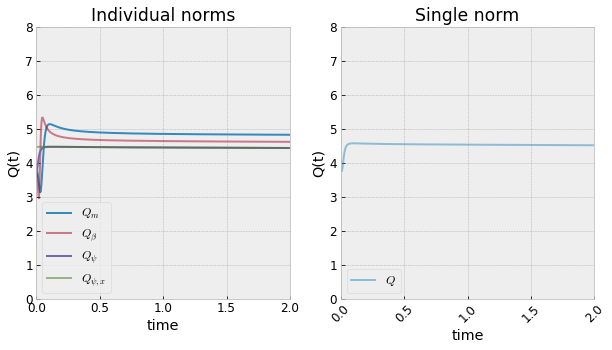

In [14]:
Q_m = []
Q_beta = []
Q_psi = []
Q_derpsi = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxm = []
    auxbeta = []
    auxpsi = []
    auxderpsi = []

    for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxm.append(datam[1][t2][i])
            auxbeta.append(databeta[1][t2][i])
            auxpsi.append(datapsi[1][t2][i])
            auxderpsi.append(dataderpsi[1][t2][i])
            #print(datam[1][0][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))

    # for given t

    aux2m = []
    aux2beta = []
    aux2psi = []
    aux2derpsi = []
    for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2m.append(datam[2][t3][i])
            aux2beta.append(databeta[2][t3][i])
            aux2psi.append(datapsi[2][t3][i])
            aux2derpsi.append(dataderpsi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxm,aux2m))
    diffs_4_2.append(np.subtract(auxbeta,aux2beta))
    diffs_4_2.append(np.subtract(auxpsi,aux2psi))
    diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(4):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_beta.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 2.0, len(Q_m))
#plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))
with plt.style.context('bmh'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_m, label = '$Q_m$')
    ax[0].plot(plt_x, Q_beta, label = '$Q_{\\beta}$',alpha=0.5)
    ax[0].plot(plt_x, Q_psi, label = '$Q_{\psi}$')
    ax[0].plot(plt_x, Q_derpsi, label = '$Q_{\psi,x}$',alpha=0.5)
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,2.0])
    ax[0].legend(loc ="lower left")
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('Q(t)')
    ax[0].set_title('Individual norms')
    
    
    ax[1].plot(plt_x, Q, label = '$Q$',alpha=0.5)
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,2.0])
    ax[1].legend(loc ="lower left")
    ax[1].set_title('Single norm')
    plt.xticks(rotation=45)
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('Q(t)')

plt.show()

In [26]:
Q_derpsi

[nan,
 4.1060287708914345,
 4.0398584475487205,
 3.9867754692914095,
 3.936294421884675,
 3.8859095819239915,
 3.832233130498777,
 3.774891309488579,
 3.713381882619406,
 3.64742929184731,
 3.5771333725038614,
 3.502836616345957,
 3.4248591246673055,
 3.3436297210918497,
 3.2596213006081025,
 3.1733222382720077,
 3.0852448317624948,
 2.9959313635489737,
 2.9058162599946327,
 2.8153818659809153,
 2.7250843257696844,
 2.635310407715218,
 2.5464598778994616,
 2.458887204230653,
 2.3729374496250144,
 2.288899488024642,
 2.207077941367184,
 2.127730167628751,
 2.0510830429693825,
 1.9773485063724814,
 1.90671124646566,
 1.8393193746055372,
 1.7752926922089305,
 1.714721284274803,
 1.6576577204940435,
 1.6041268136147566,
 1.5541133611947657,
 1.5075782339123938,
 1.4644474277657635,
 1.4246254017784215,
 1.3879904779327457,
 1.3544063065275718,
 1.3237167626482966,
 1.295759719305912,
 1.270364299550405,
 1.2473568886706565,
 1.2265635013371747,
 1.2078134893468953,
 1.1909417078252271,
 1.

# Pointwise convergence through time

In [28]:
time_frame=range(0,int(final_t/4),1)
pw_m_21 = []
pw_m_42 = []
pw_beta_21 = []
pw_beta_42 = []
pw_psi_21 = []
pw_psi_42 = []
pw_derpsi_21 = []
pw_derpsi_42 = []

for i in time_frame:
    # for given t
    t1=i #last timestep
    t2=2*t1
    t3=4*t1
    auxm = []
    auxbeta = []
    auxpsi = []
    auxderpsi = []
    auxgrid = []

    for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxm.append(datam[1][t2][i])
            auxbeta.append(databeta[1][t2][i])
            auxpsi.append(datapsi[1][t2][i])
            auxderpsi.append(dataderpsi[1][t2][i])
            auxgrid.append(datagrid[1][t2][i])
            #print(datam[1][0][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))
    diffs_2_1.append(np.subtract(datagrid[0][t1][3:len(datagrid[0][t1])-3],auxgrid))

    # for given t

    aux2m = []
    aux2beta = []
    aux2psi = []
    aux2derpsi = []
    aux2grid = []
    for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2m.append(datam[2][t3][i])
            aux2beta.append(databeta[2][t3][i])
            aux2psi.append(datapsi[2][t3][i])
            aux2derpsi.append(dataderpsi[2][t3][i])
            aux2grid.append(datagrid[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxm,aux2m))
    diffs_4_2.append(np.subtract(auxbeta,aux2beta))
    diffs_4_2.append(np.subtract(auxpsi,aux2psi))
    diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))
    diffs_4_2.append(np.subtract(auxgrid,aux2grid))

    pw_m_21.append(abs(diffs_2_1[0]))
    pw_m_42.append(abs(diffs_4_2[0])*16)
    pw_beta_21.append(abs(diffs_2_1[1]))
    pw_beta_42.append(abs(diffs_4_2[1])*16)
    pw_psi_21.append(abs(diffs_2_1[2]))
    pw_psi_42.append(abs(diffs_4_2[2])*16)
    pw_derpsi_21.append(abs(diffs_2_1[3]))
    pw_derpsi_42.append(abs(diffs_4_2[3])*16)

In [30]:
step=5

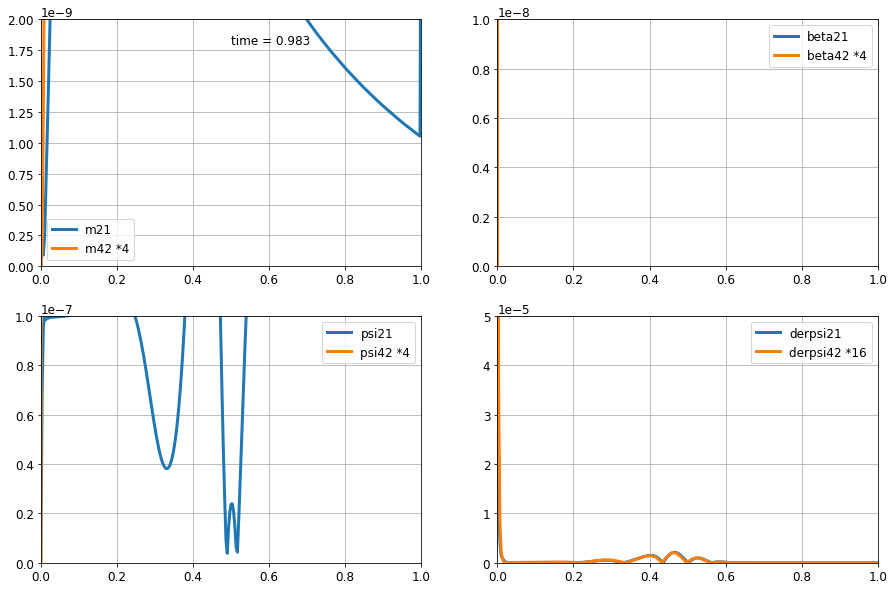

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(2,2,figsize=(15, 10))
for j in range(0,2):
    for i in range(0,2):
        ax[i][j].set_xlim(0, 1)
        ax[i][j].grid()
#2th
ax[0][0].set_ylim(0, 2*10**(-9))
ax[0][1].set_ylim(0, 10**(-8))
ax[1][0].set_ylim(0, 10**(-7))
ax[1][1].set_ylim(0, 5*10**(-5))
#4th
#ax[0][0].set_ylim(0, 2*10**(-11))
#ax[0][1].set_ylim(0, 10**(-8))
#ax[1][0].set_ylim(0, 10**(-9))
#ax[1][1].set_ylim(0, 10**(-9))

line1, = ax[0][0].plot([], [], lw = 3)
line2, = ax[0][0].plot([], [], lw = 3)

time_text = ax[0][0].text(0.5, 0.9, '', transform=ax[0][0].transAxes)

line3, = ax[0][1].plot([], [], lw = 3)
line4, = ax[0][1].plot([], [], lw = 3)

line5, = ax[1][0].plot([], [], lw = 3)
line6, = ax[1][0].plot([], [], lw = 3)

line7, = ax[1][1].plot([], [], lw = 3)
line8, = ax[1][1].plot([], [], lw = 3)


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line1,line2,time_text

def animate(i):
    # m
    x = plt_x1
    y = pw_m_21[i]
    y2 = pw_m_42[i]
    line1.set_data(x, y)
    line2.set_data(x, y2)
    line1.set_label('m21')
    line2.set_label('m42 *4')
    ax[0][0].legend()
    
    # beta
    x = plt_x1
    y = pw_beta_21[i]
    y2 = pw_beta_42[i]
    line3.set_data(x, y)
    line4.set_data(x, y2)
    line3.set_label('beta21')
    line4.set_label('beta42 *4')
    ax[0][1].legend()
    
    # psi
    x = plt_x1
    y = pw_psi_21[i]
    y2 = pw_psi_42[i]
    line5.set_data(x, y)
    line6.set_data(x, y2)
    line5.set_label('psi21')
    line6.set_label('psi42 *4')
    ax[1][0].legend()
    
    # der psi
    x = plt_x1
    y = pw_derpsi_21[i]
    y2 = pw_derpsi_42[i]
    line7.set_data(x, y)
    line8.set_data(x, y2)
    line7.set_label('derpsi21')
    line8.set_label('derpsi42 *16')
    ax[1][1].legend()
    
    t=i*dx*step
    time_text.set_text('time = %.3f' % t)
    
    return line1,line2,line3,line4,line5,line6,line7,line8,time_text
 

anim = FuncAnimation(fig, animate,
                    init_func = init,
                    frames = len(time_frame),
                    interval = 200,
                    blit = False,repeat=False)

anim.save('pointwise.gif',
          writer = 'ffmpeg', fps = 2*4)

# Changing grid and fixed timestep

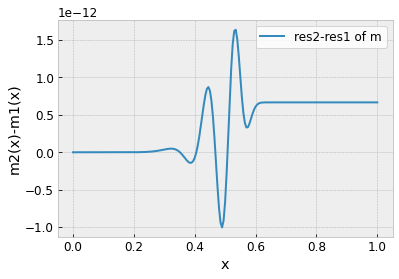

In [85]:
import scipy
# for given t
t1=0 #last timestep
t2=2*t1
t3=4*t1

spl_m = scipy.interpolate.splrep(datagrid[1][t2],datam[1][t2],k=4)
spl_beta = scipy.interpolate.splrep(datagrid[1][t2],databeta[1][t2],k=4)
spl_psi = scipy.interpolate.splrep(datagrid[1][t2],datapsi[1][t2],k=4)
spl_derpsi = scipy.interpolate.splrep(datagrid[1][t2],dataderpsi[1][t2],k=4)

#evaluate interpolation of data res2 on grid of res1
m2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
beta2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
psi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
derpsi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)
        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],m2))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],beta2))
diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],psi2))
diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],derpsi2))

with plt.style.context('bmh'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()

### Pointwise convergence tests - Changing grid

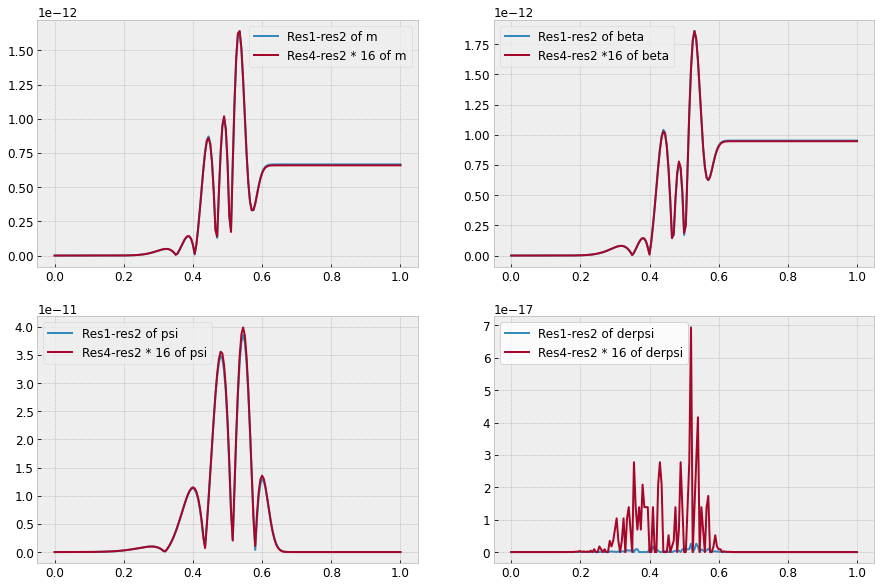

In [86]:
# for given t

spl_m = scipy.interpolate.splrep(datagrid[2][t3],datam[2][t3],k=4)
spl_beta = scipy.interpolate.splrep(datagrid[2][t3],databeta[2][t3],k=4)
spl_psi = scipy.interpolate.splrep(datagrid[2][t3],datapsi[2][t3],k=4)
spl_derpsi = scipy.interpolate.splrep(datagrid[2][t3],dataderpsi[2][t3],k=4)


#evaluate interpolation of data res2 on grid of res1
m3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
beta3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
psi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
derpsi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)

#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(m2,m3))
diffs_4_2.append(np.subtract(beta2,beta3))
diffs_4_2.append(np.subtract(psi2,psi3))
diffs_4_2.append(np.subtract(derpsi2,derpsi3))

plt_x1 = datagrid[0][t1][3:len(datagrid[0][t1])-3]

with plt.style.context('bmh'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))

    ax[0][0].plot(plt_x1, abs(diffs_2_1[0]), label='Res1-res2 of m')
    ax[0][0].plot(plt_x1, abs(diffs_4_2[0])*16, label='Res4-res2 * 16 of m')
    ax[0][0].legend()
    
    ax[0][1].plot(plt_x1, abs(diffs_2_1[1]), label='Res1-res2 of beta')
    ax[0][1].plot(plt_x1, abs(diffs_4_2[1])*16, label='Res4-res2 *16 of beta')
    #ax[0][1].set_xlim([0, 0.05])
    #ax[0][1].set_ylim([0, 1*10**(-11)])
    ax[0][1].legend()
    
    ax[1][0].plot(plt_x1, abs(diffs_2_1[2]), label='Res1-res2 of psi')
    ax[1][0].plot(plt_x1, abs(diffs_4_2[2])*16, label='Res4-res2 * 16 of psi')

    ax[1][0].legend()
    
    ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([0, 0.2])
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()

plt.legend()
plt.show()



### Q(t) - Changing grid

In [87]:
Q_m = []
Q_beta = []
Q_psi = []
Q_derpsi = []

for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    
    ## diffs 2 1 ##
    
    spl_m = scipy.interpolate.splrep(datagrid[1][t2],datam[1][t2],k=4)
    spl_beta = scipy.interpolate.splrep(datagrid[1][t2],databeta[1][t2],k=4)
    spl_psi = scipy.interpolate.splrep(datagrid[1][t2],datapsi[1][t2],k=4)
    spl_derpsi = scipy.interpolate.splrep(datagrid[1][t2],dataderpsi[1][t2],k=4)

    #evaluate interpolation of data res2 on grid of res1
    m2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
    beta2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
    psi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
    derpsi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)

    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],m2))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],beta2))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],psi2))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],derpsi2))

    ## diffs 4 2 ##

    spl_m = scipy.interpolate.splrep(datagrid[2][t3],datam[2][t3],k=4)
    spl_beta = scipy.interpolate.splrep(datagrid[2][t3],databeta[2][t3],k=4)
    spl_psi = scipy.interpolate.splrep(datagrid[2][t3],datapsi[2][t3],k=4)
    spl_derpsi = scipy.interpolate.splrep(datagrid[2][t3],dataderpsi[2][t3],k=4)


    #evaluate interpolation of data res2 on grid of res1
    m3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
    beta3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
    psi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
    derpsi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)

    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(m2,m3))
    diffs_4_2.append(np.subtract(beta2,beta3))
    diffs_4_2.append(np.subtract(psi2,psi3))
    diffs_4_2.append(np.subtract(derpsi2,derpsi3))


    ####

    norm_low_med = []
    norm_med_high = []

    for j in range(4):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
        for i in diffs_4_2[j]:
            b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_beta.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))

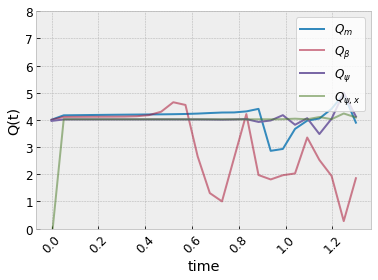

In [88]:
dt=dx
finaltime=(count-1)/8*step*dt
#plt_x = np.linspace(0, int(final_t/4)*dx*step*0.8, int(final_t/4))
plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))

with plt.style.context('bmh'):
    plt.plot(plt_x, Q_m, label = '$Q_m$')
    plt.plot(plt_x, Q_beta, label = '$Q_{\\beta}$',alpha=0.5)
    plt.plot(plt_x, Q_psi, label = '$Q_{\psi}$')
    plt.plot(plt_x, Q_derpsi, label = '$Q_{\psi,x}$',alpha=0.5)
    

plt.ylim([0, 8])

plt.legend(loc ="upper right")
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('Q(t)')
#plt.savefig("myImage.png", format="png", dpi=2000,bbox_inches='tight')
plt.show()

# Fixed grid and changing timestep

In [91]:
time_arrays=[]
for resolution in res:
    with pd.option_context('display.precision', 20):
        df = pd.read_csv("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/timearray{}.csv".format(resolution), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        aux = [float(x) for x in df[0]]
        time_arrays.append(aux)

In [108]:
aux=[]
for i in range(0,len(time_arrays[1])):
    if i%2==0:
        aux.append(time_arrays[1][i])
aux       
np.subtract(time_arrays[0],aux)

array([ 0.00000000e+00, -3.46944695e-18, -3.46944695e-18, -3.46944695e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [109]:
#time_arrays[0]

In [110]:
x_i = 0
np.transpose(datam[0])[x_i] #this array is the value of m over time at gridpoint x_i

array([-1.46466297e-20,  4.05183323e-20,  2.02564244e-19,  6.14090671e-19,
        1.49424577e-18,  3.20702973e-18,  6.34156709e-18,  1.18317450e-17,
        2.11328282e-17,  3.64799764e-17,  6.12637563e-17,  1.00571800e-16,
        1.61965121e-16,  2.56584154e-16,  4.00715793e-16,  6.18001992e-16,
        9.42537115e-16,  1.42319107e-15,  2.12961583e-15,  3.16055380e-15,
        4.65528091e-15])

In [116]:
import scipy
interp_funcs_res2=[]
for x_i in range(3,len(dataderpsi[1][0])-3): #iterate over gridpoints on grid with res2, ignoring ghostpoints
    
    if x_i%2!=0:

        x=time_arrays[1]
        y = np.transpose(dataderpsi[1])[x_i]
        #print("x ", x)
        #print("y ", y)
        #print("   ")
        
        #f=interpolate.interp1d(x, y)
        spl_f = scipy.interpolate.splrep(x,y,k=5)
        
        interp_funcs_res2.append(spl_f)
        #plt.scatter(x,y)
        #plt.ylim([-0.002, 0.002])
        #plt.show()
        
interp_funcs_res4=[]
for x_i in range(3,len(dataderpsi[2][0])-3): #iterate over gridpoints on grid with res4, ignoring ghostpoints
    
    if (x_i+1)%4==0:
        
        x=time_arrays[2]
        y = np.transpose(dataderpsi[2])[x_i]
        #print("x ", x)
        #print("y ", y)
        #print("   ")
        
        #f=interpolate.interp1d(x, y)
        spl_f = scipy.interpolate.splrep(x,y,k=5)
        
        interp_funcs_res4.append(spl_f)

In [117]:

diffs_2_1=[]
diffs_4_2=[]

for j in range(0,len(dataderpsi[0])): #iterate on time
    aux2=[]
    aux4=[]
    
    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints
        t=time_arrays[0][j]
        #print(t)
        #aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))
        #aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))
        aux2.append(dataderpsi[0][j][i]-float(scipy.interpolate.splev(t,interp_funcs_res2[i-3])))
        aux4.append(dataderpsi[0][j][i]-float(scipy.interpolate.splev(t,interp_funcs_res4[i-3])))
        
    #print(np.subtract(aux2,aux4))
    #print(aux4)
    diffs_2_1.append(aux2)
    diffs_4_2.append(aux4)

In [118]:
"""diffs_2_1=[]
diffs_4_2=[]

for j in range(0,len(dataderpsi[0])): #iterate on time
    aux2=[]
    aux4=[]
    
    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints
        t=time_arrays[0][j]
        #print(t)
        aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))
        aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))
    #print(np.subtract(aux2,aux4))
    #print(aux4)
    diffs_2_1.append(aux2)
    diffs_4_2.append(aux4)"""

'diffs_2_1=[]\ndiffs_4_2=[]\n\nfor j in range(0,len(dataderpsi[0])): #iterate on time\n    aux2=[]\n    aux4=[]\n    \n    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints\n        t=time_arrays[0][j]\n        #print(t)\n        aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))\n        aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))\n    #print(np.subtract(aux2,aux4))\n    #print(aux4)\n    diffs_2_1.append(aux2)\n    diffs_4_2.append(aux4)'

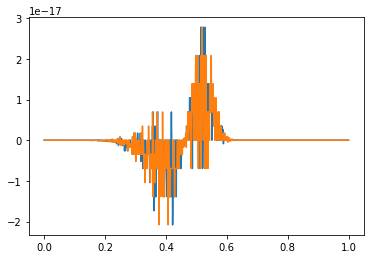

In [119]:
x=np.linspace(0,1,len(diffs_2_1[0]))
plt.plot(x,diffs_2_1[0])
x=np.linspace(0,1,len(diffs_4_2[0]))
plt.plot(x,diffs_4_2[0])

In [115]:
######## t=0 ########
normlow_med=0
for i in diffs_2_1[1]:
    normlow_med += i**2
normlow_med=math.sqrt(normlow_med)
normmed_high=0
for i in diffs_4_2[1]:
    normmed_high += i**2
normmed_high=math.sqrt(normmed_high)

math.log2(normlow_med/normmed_high)

-0.08683023373817983

In [327]:
len(diffs_2_1)

11

# ****

interpolate m data (z) on grid (x) and time (y), resolution 2

In [79]:


Nt = len(datam[1]) #number of timesteps

# grid
x=[]
for i in range(0,Nt):
    Nx = len(datagrid[1][i])
    for j in range(0,Nx):
        x.append(datagrid[1][i][j])

# time
y=[]
for i in range(0,Nt):
    Nx = len(datam[1][i])
    for j in range(0,Nx):
        y.append(time_arrays[1][i])

# data
z=[]
for i in range(0,Nt):
    Nx = len(datam[1][i])
    for j in range(0,Nx):
        z.append(datam[1][i][j])


interp2=interpolate.interp2d(x, y, z, kind='quintic')

MemoryError: 

interpolate m data (z) on grid (x) and time (y), resolution 3

In [ ]:
import numpy as np
from scipy import interpolate

Nt = len(datam[2]) #number of timesteps

# grid
x=[]
for i in range(0,2):
    Nx = len(datagrid[2][i])
    for j in range(0,Nx):
        x.append(datagrid[2][i][j])

# time
y=[]
for i in range(0,2):
    Nx = len(datam[2][i])
    for j in range(0,Nx):
        y.append(time_arrays[2][i])

# data
z=[]
for i in range(0,2):
    Nx = len(datam[2][i])
    for j in range(0,Nx):
        z.append(datam[2][i][j])


interp4=interpolate.interp2d(x, y, z, kind='quintic')


3D plot of m data over time

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = datagrid[1][0]
y = time_arrays[1]

X, Y = np.meshgrid(x, y)
#Z=f(X,Y)
Z = []
for i in range(0,len(y)):
    aux=[]
    for k in range(0,len(x)):
        aux.append(datam[1][i][k])
    Z.append(aux)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


In [ ]:
len(y)

In [80]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(0, 1, 200)
y = np.linspace(0, 0.04, 5)

X, Y = np.meshgrid(x, y)
#Z=f(X,Y)
Z = []
for i in range(0,len(y)):
    aux=[]
    for k in range(0,len(x)):
        aux.append(interp2(x[k],y[i])[0])
    Z.append(aux)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

NameError: name 'interp2' is not defined

In [81]:
t1=0
diffs_2_1=[]
for i in range(0,len(time_arrays[0])):#iterate on t
    auxm=[]
    t1 = time_arrays[0][i]
    for j in range(0,len(datam[0][i])):
        x = datagrid[0][i]
        auxm.append(interp2(x,t)[0])
    diffs_2_1.append(np.subtract(datam[0][i],auxm))
len(auxm) 
    


NameError: name 'interp2' is not defined

In [82]:
t1=0
diffs_4_2=[]
for i in range(0,len(time_arrays[0])):#iterate on t
    auxm2=[]
    auxm4=[]
    t1 = time_arrays[0][i]
    for j in range(0,len(datam[0][i])):
        x = datagrid[0][i]
        auxm2.append(interp2(x,t)[0])
        auxm4.append(interp4(x,t)[0])
    diffs_4_2.append(np.subtract(auxm4,auxm2))
len(auxm) 
    


NameError: name 'interp2' is not defined

In [47]:
norm_low_med = []
norm_med_high = []

for j in range(0,len(time_arrays)):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))

Q_m

In [48]:
Q_m

[3.998204305872114, 4.013585341089867, 32.7443907763087]

In [84]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b, c):

    return a * np.exp(-b * x) + c

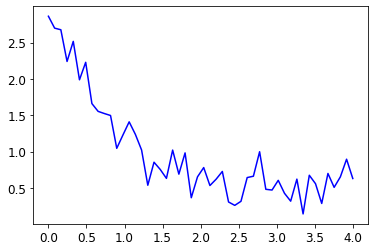

In [86]:
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')


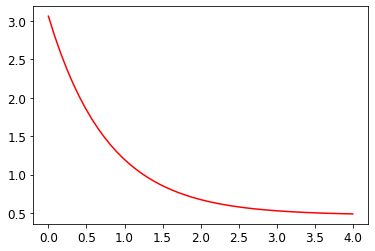

In [89]:
popt, pcov = curve_fit(func, xdata, ydata)

popt

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))